### Importing libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv("songs.csv")

Here we get the basic info about all the columns in the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                900 non-null    int64  
 1   track_id                  900 non-null    object 
 2   track_name                900 non-null    object 
 3   track_artist              900 non-null    object 
 4   track_popularity          900 non-null    float64
 5   track_album_release_date  900 non-null    object 
 6   playlist_genre            900 non-null    object 
 7   danceability              900 non-null    float64
 8   energy                    900 non-null    float64
 9   key                       900 non-null    float64
 10  loudness                  900 non-null    float64
 11  mode                      900 non-null    float64
 12  speechiness               900 non-null    float64
 13  acousticness              900 non-null    float64
 14  liveness  

The dataset contains 900 rows and 28 columns. <br>
No missing values.<br>
Data types: numerical (float64, int64) and categorical (object).<br>
Some columns (track_id, track_name, track_artist) are identifiers, while others (danceability, energy, etc.) are numeric features for analysis.<br>

In [14]:
object_cols = data.select_dtypes(include=['object']).columns.tolist()

In [15]:
object_cols

['track_id',
 'track_name',
 'track_artist',
 'track_album_release_date',
 'playlist_genre',
 'track_artist_merged',
 'lyrics',
 'artist_name',
 'tags',
 'tags_tokenized',
 'doc_vector',
 'combined_vector',
 'image_url',
 'spotify_url']

In [9]:
data.head()

,Unnamed: 0,track_id,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,danceability,energy,key,...,track_artist_merged,lyrics,artist_name,tags,tags_tokenized,doc_vector,combined_vector,cluster,image_url,spotify_url
0,0,6oJ6le65B3SEqPwMRNXWjY,higher love,Kygo,0.500000,2019-06-28,Pop,0.632680,0.667346,0.727273,...,kygo,"['bring', 'me', 'higher', 'love,', 'love', '',...",Kygo,bring higher love love bring higher love think...,"['bring', 'higher', 'love', 'love', 'bring', '...",[-0.1148182 0.27755967 0.27891365 0.143460...,[-0.1148182 0.27755967 0.27891365 0.143460...,3,https://i.scdn.co/image/ab67616d0000b2737c8977...,https://open.spotify.com/track/6oJ6le65B3SEqPw...
1,1,3yNZ5r3LKfdmjoS3gkhUCT,bad guy (with justin bieber),Billieeilish,0.318182,2019-07-11,Pop,0.602614,0.425904,0.000000,...,billie eilish,"['yeah,', 'yeah', '', 'oh,', 'ah', '', 'white'...",Billie Eilish,yeah yeah oh ah white shirt red bloody nose sl...,"['yeah', 'yeah', 'oh', 'ah', 'white', 'shirt',...",[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,[-2.95320839e-01 -2.59309914e-03 3.84592146e-...,1,https://i.scdn.co/image/ab67616d0000b273a69b8b...,https://open.spotify.com/track/3yNZ5r3LKfdmjoS...
2,2,0qc4QlcCxVTGyShurEv1UU,post malone (feat. rani),Samfeldt,0.318182,2019-05-24,Pop,0.498039,0.628716,0.636364,...,sam feldt,"['one', 'more', 'drink,', 'got', 'one', 'more'...",Sam Feldt,one drink got one bacardi one dance afterparty...,"['one', 'drink', 'got', 'one', 'bacardi', 'one...",[-0.1616459 0.21872164 0.3755187 0.116120...,[-0.1616459 0.21872164 0.37551871 0.116120...,3,https://i.scdn.co/image/ab67616d0000b27354de16...,https://open.spotify.com/track/0qc4QlcCxVTGySh...
3,3,4PkIDTPGedm0enzdvilLNd,sixteen,Elliegoulding,0.227273,2019-04-12,Pop,0.601307,0.799335,0.727273,...,ellie goulding,"['(sixteen)', '', '(sixteen)', '', 'do', 'you'...",Ellie Goulding,sixteen sixteen remember moved mum said love s...,"['sixteen', 'sixteen', 'remember', 'moved', 'm...",[-0.17123666 0.15697554 0.2319686 0.190121...,[-0.17123666 0.15697554 0.2319686 0.190121...,3,https://i.scdn.co/image/ab67616d0000b27394181f...,https://open.spotify.com/track/4PkIDTPGedm0enz...
4,4,5PYQUBXc7NYeI1obMKSJK0,never really over,Katyperry,0.409091,2019-05-31,Pop,0.733333,0.886254,0.727273,...,katy perry,"[""i'm"", 'losing', 'my', 'self', 'control', '',...",Katy Perry,im losing self control yeah youre starting tri...,"['im', 'losing', 'self', 'control', 'yeah', 'y...",[-0.26988247 0.21529263 0.3686135 0.180054...,[-0.26988247 0.21529263 0.36861351 0.180054...,3,https://i.scdn.co/image/ab67616d0000b2739bea3b...,https://open.spotify.com/track/5PYQUBXc7NYeI1o...


In [10]:
data.shape

(900, 28)

In [11]:
data.isnull().sum()

Unnamed: 0                  0
track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_release_date    0
playlist_genre              0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_artist_merged         0
lyrics                      0
artist_name                 0
tags                        0
tags_tokenized              0
doc_vector                  0
combined_vector             0
cluster                     0
image_url                   0
spotify_url                 0
dtype: int64

Not any null value in the dataset

In [12]:
data.describe()

,Unnamed: 0,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,cluster
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,449.500000,0.199545,0.623394,0.640775,0.484444,0.726726,0.574444,0.115008,0.225910,0.160050,0.518995,0.414709,211372.507778,2.003333
std,259.951919,0.199525,0.183919,0.181130,0.334353,0.111564,0.494702,0.133004,0.238884,0.139023,0.237509,0.208335,45092.774311,1.260767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,104591.000000,0.000000
25%,224.750000,0.045455,0.504248,0.527578,0.181818,0.681972,0.000000,0.023636,0.043808,0.077727,0.334210,0.245323,181819.500000,1.000000
50%,449.500000,0.136364,0.652288,0.664127,0.454545,0.743644,1.000000,0.055262,0.140391,0.107691,0.515887,0.402658,206233.500000,2.000000
75%,674.250000,0.318182,0.749346,0.777873,0.818182,0.798564,1.000000,0.158157,0.326666,0.194965,0.705882,0.543679,232736.750000,3.000000
max,899.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,484147.000000,4.000000


Shows distribution of numerical features <br>
track_popularity ranges from 0 to 100<br>
loudness has negative values, meaning it's measured in decibels relative to full scale (dBFS)<br>
tempo varies widely, affecting rhythm analysis<br>

# Univariate Analysis

## Categorical

In [20]:
data['track_artist'].value_counts().head(10)

track_artist
Billieeilish          19
Arianagrande          12
Khalid                 8
Calvinharris           8
Theweeknd              7
Redhotchilipeppers     7
Coldplay               7
Badbunny               7
Juicewrld              7
Brunomars              7
Name: count, dtype: int64

Text(0.5, 1.0, 'Playlist Genre')

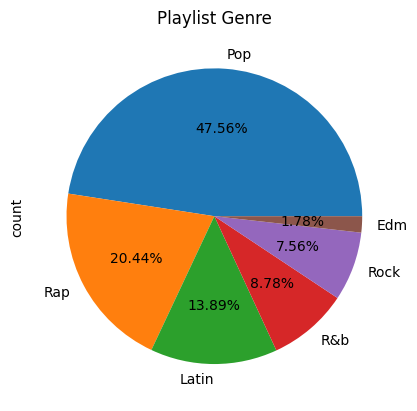

In [23]:
data['playlist_genre'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Playlist Genre')

In the above plot we can see the percentage of songs from each genre in the dataset ,depicting that number of songs of Pop genre is highest

Text(0.5, 1.0, 'Top 10 Track artist')

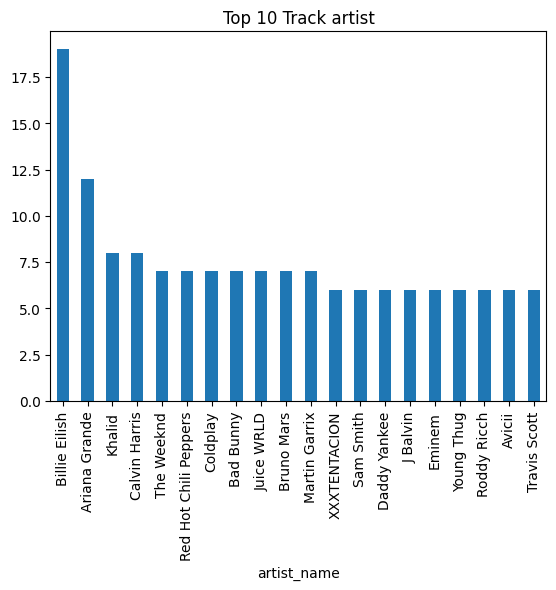

In [24]:
data['artist_name'].value_counts().head(20).plot(kind="bar")
plt.title('Top 10 Track artist')

We can see the top 10 artist in terms of creating of songs in the above plot

In [26]:
import pandas as pd

# Convert to datetime
data['track_album_release_date'] = pd.to_datetime(data['track_album_release_date'], errors='coerce')

# Check the data type
print(data['track_album_release_date'].dtype)


datetime64[ns]


In [27]:
# Extract year, month, day, and day of the week
data['year'] = data['track_album_release_date'].dt.year
data['month'] = data['track_album_release_date'].dt.month
data['day'] = data['track_album_release_date'].dt.day
data['day_of_week'] = data['track_album_release_date'].dt.day_name()


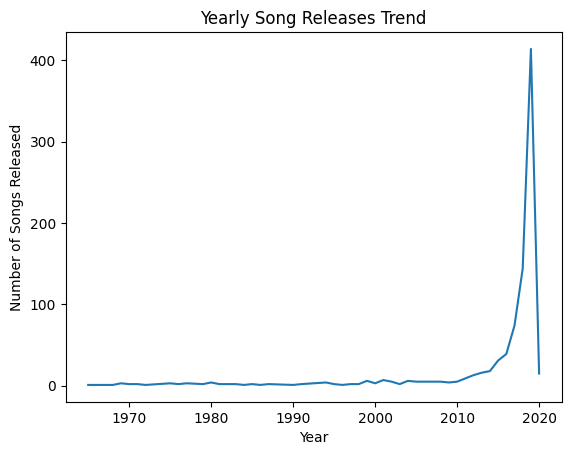

In [28]:
import matplotlib.pyplot as plt

data['year'].value_counts().sort_index().plot(kind='line')
plt.xlabel("Year")
plt.ylabel("Number of Songs Released")
plt.title("Yearly Song Releases Trend")
plt.show()


Above is the plot of yearly song releases trend , which shows that in the past 10 years there is huge increase in the creation of songs

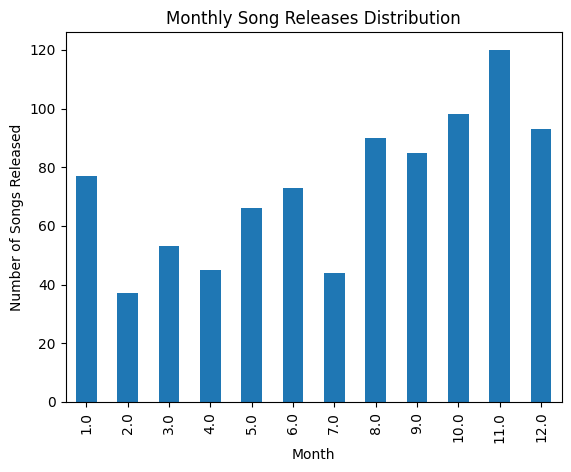

In [29]:
data['month'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Number of Songs Released")
plt.title("Monthly Song Releases Distribution")
plt.show()


Monthly trends of songs creation does not give us any insight , but we can consider that in November most of the songs released

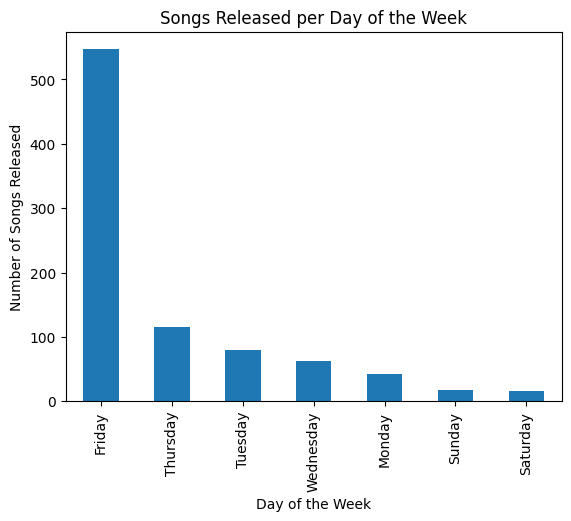

In [30]:
data['day_of_week'].value_counts().plot(kind='bar')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Songs Released")
plt.title("Songs Released per Day of the Week")
plt.show()


Above plot tells us that most of the songs released on Friday.

## Numerical

Text(0.5, 1.0, 'Distribution of rating')

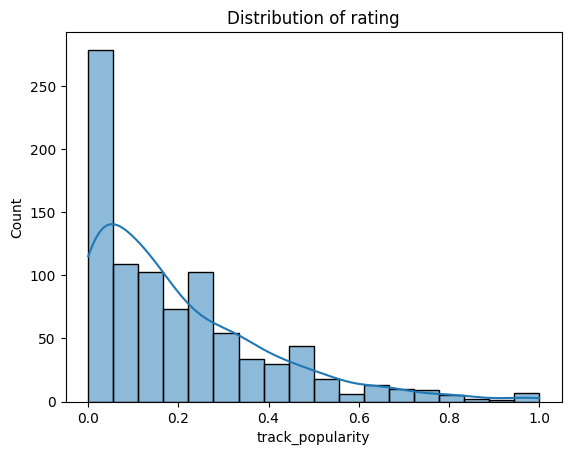

In [37]:
sns.histplot(data['track_popularity'],kde=True)
plt.title('Distribution of rating')

Most songs have popularity below 0.5<br>
Few songs have a popularity of 1, indicating some hits

In [35]:
data['track_popularity'].skew()

1.39536549073738

Text(0.5, 1.0, 'Distribution of duration')

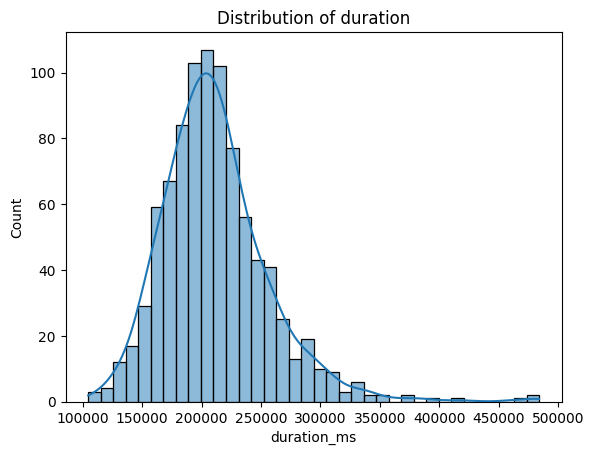

In [47]:
sns.histplot(data['duration_ms'],kde=True)
plt.title('Distribution of duration')

The curve is somewhat symmetrical about 2000000 ms , this shows that most of the songs duration lies around 100000 ms to 300000ms while some have above 300000 ms duration also

Text(0.5, 1.0, 'Box Plot of distribution')

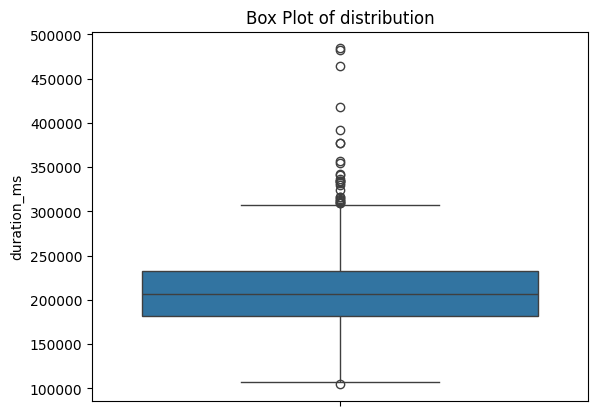

In [48]:
sns.boxplot(data['duration_ms'])
plt.title('Box Plot of distribution')

Above is the boxplot of the duration_ms , where we can visualise the outliers , mean value and some other statistical data

Text(0.5, 1.0, 'Loudness')

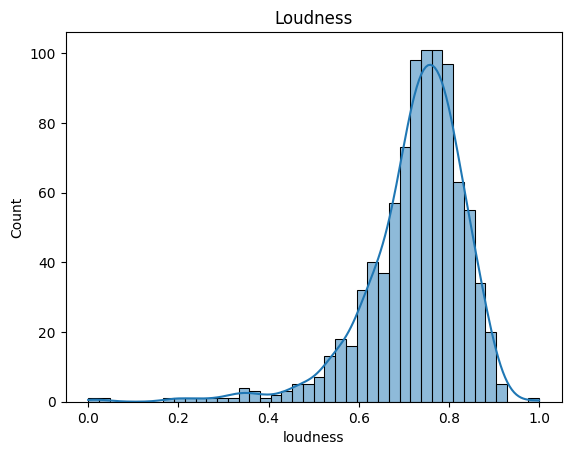

In [40]:
sns.histplot(data['loudness'],kde=True)
plt.title('Loudness')

Most of the songs have higher loudness  , suggesting that more loud voice is trending in the society

Text(0.5, 1.0, 'Distribution of danceability')

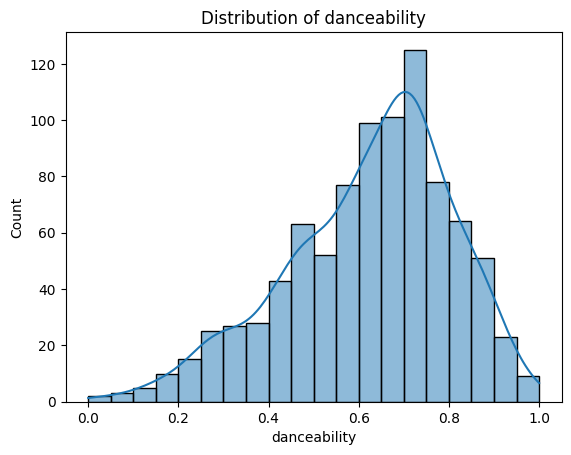

In [42]:
sns.histplot(data['danceability'],kde=True)
plt.title('Distribution of danceability')

Danceability is also somewhat high in the songs , suggesting that people want to chill out with the songs

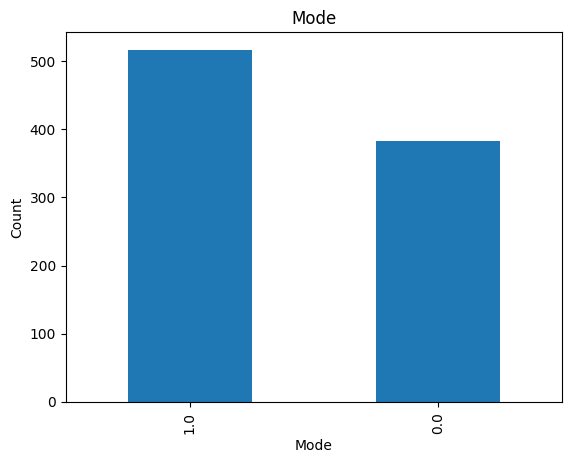

In [46]:
data['mode'].value_counts().plot(kind='bar')
plt.xlabel("Mode")
plt.ylabel("Count")
plt.title("Mode")
plt.show()

Major mode (1) → Majority of the songs have a bright, uplifting, or happy tone<br>
Minor mode (0) → A significant portion of songs have a darker, melancholic, or emotional tone.<br>
Since major-mode songs are more frequent, the dataset leans towards energetic and positive-sounding music rather than somber or moody tracks.

## Multivariate

<Axes: xlabel='playlist_genre', ylabel='track_popularity'>

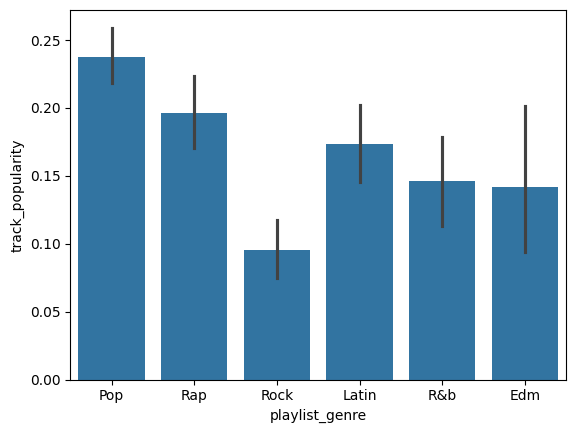

In [56]:
sns.barplot(data=data,x="playlist_genre",y="track_popularity")

Here we can see the track popularity of each genre , which suggest that people like Pop music most

In [65]:
num_cols=['danceability','energy','key','loudness','mode','speechiness','acousticness','liveness','valence','tempo']

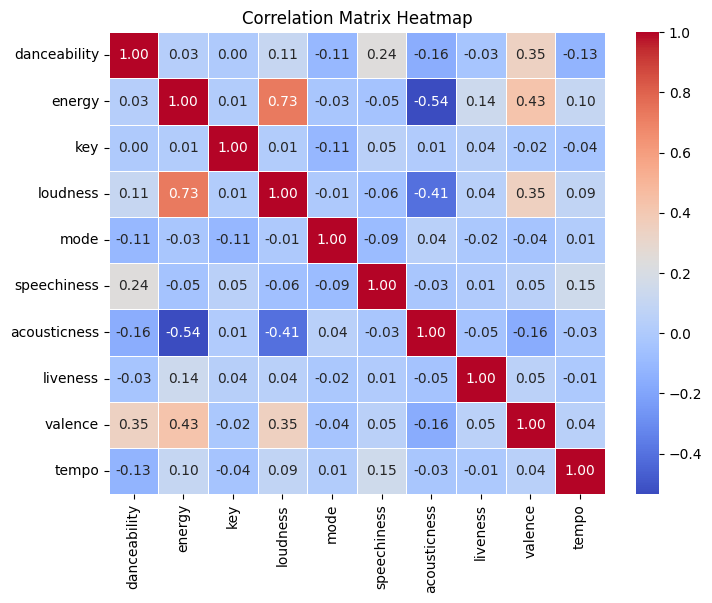

In [66]:
# Compute Correlation Matrix
corr_matrix = data[num_cols].corr()

# Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title
plt.title("Correlation Matrix Heatmap")

plt.show()

Highlights strong and weak correlations<br>
Features like loudness and energy are highly correlated that can be visualised here<br>

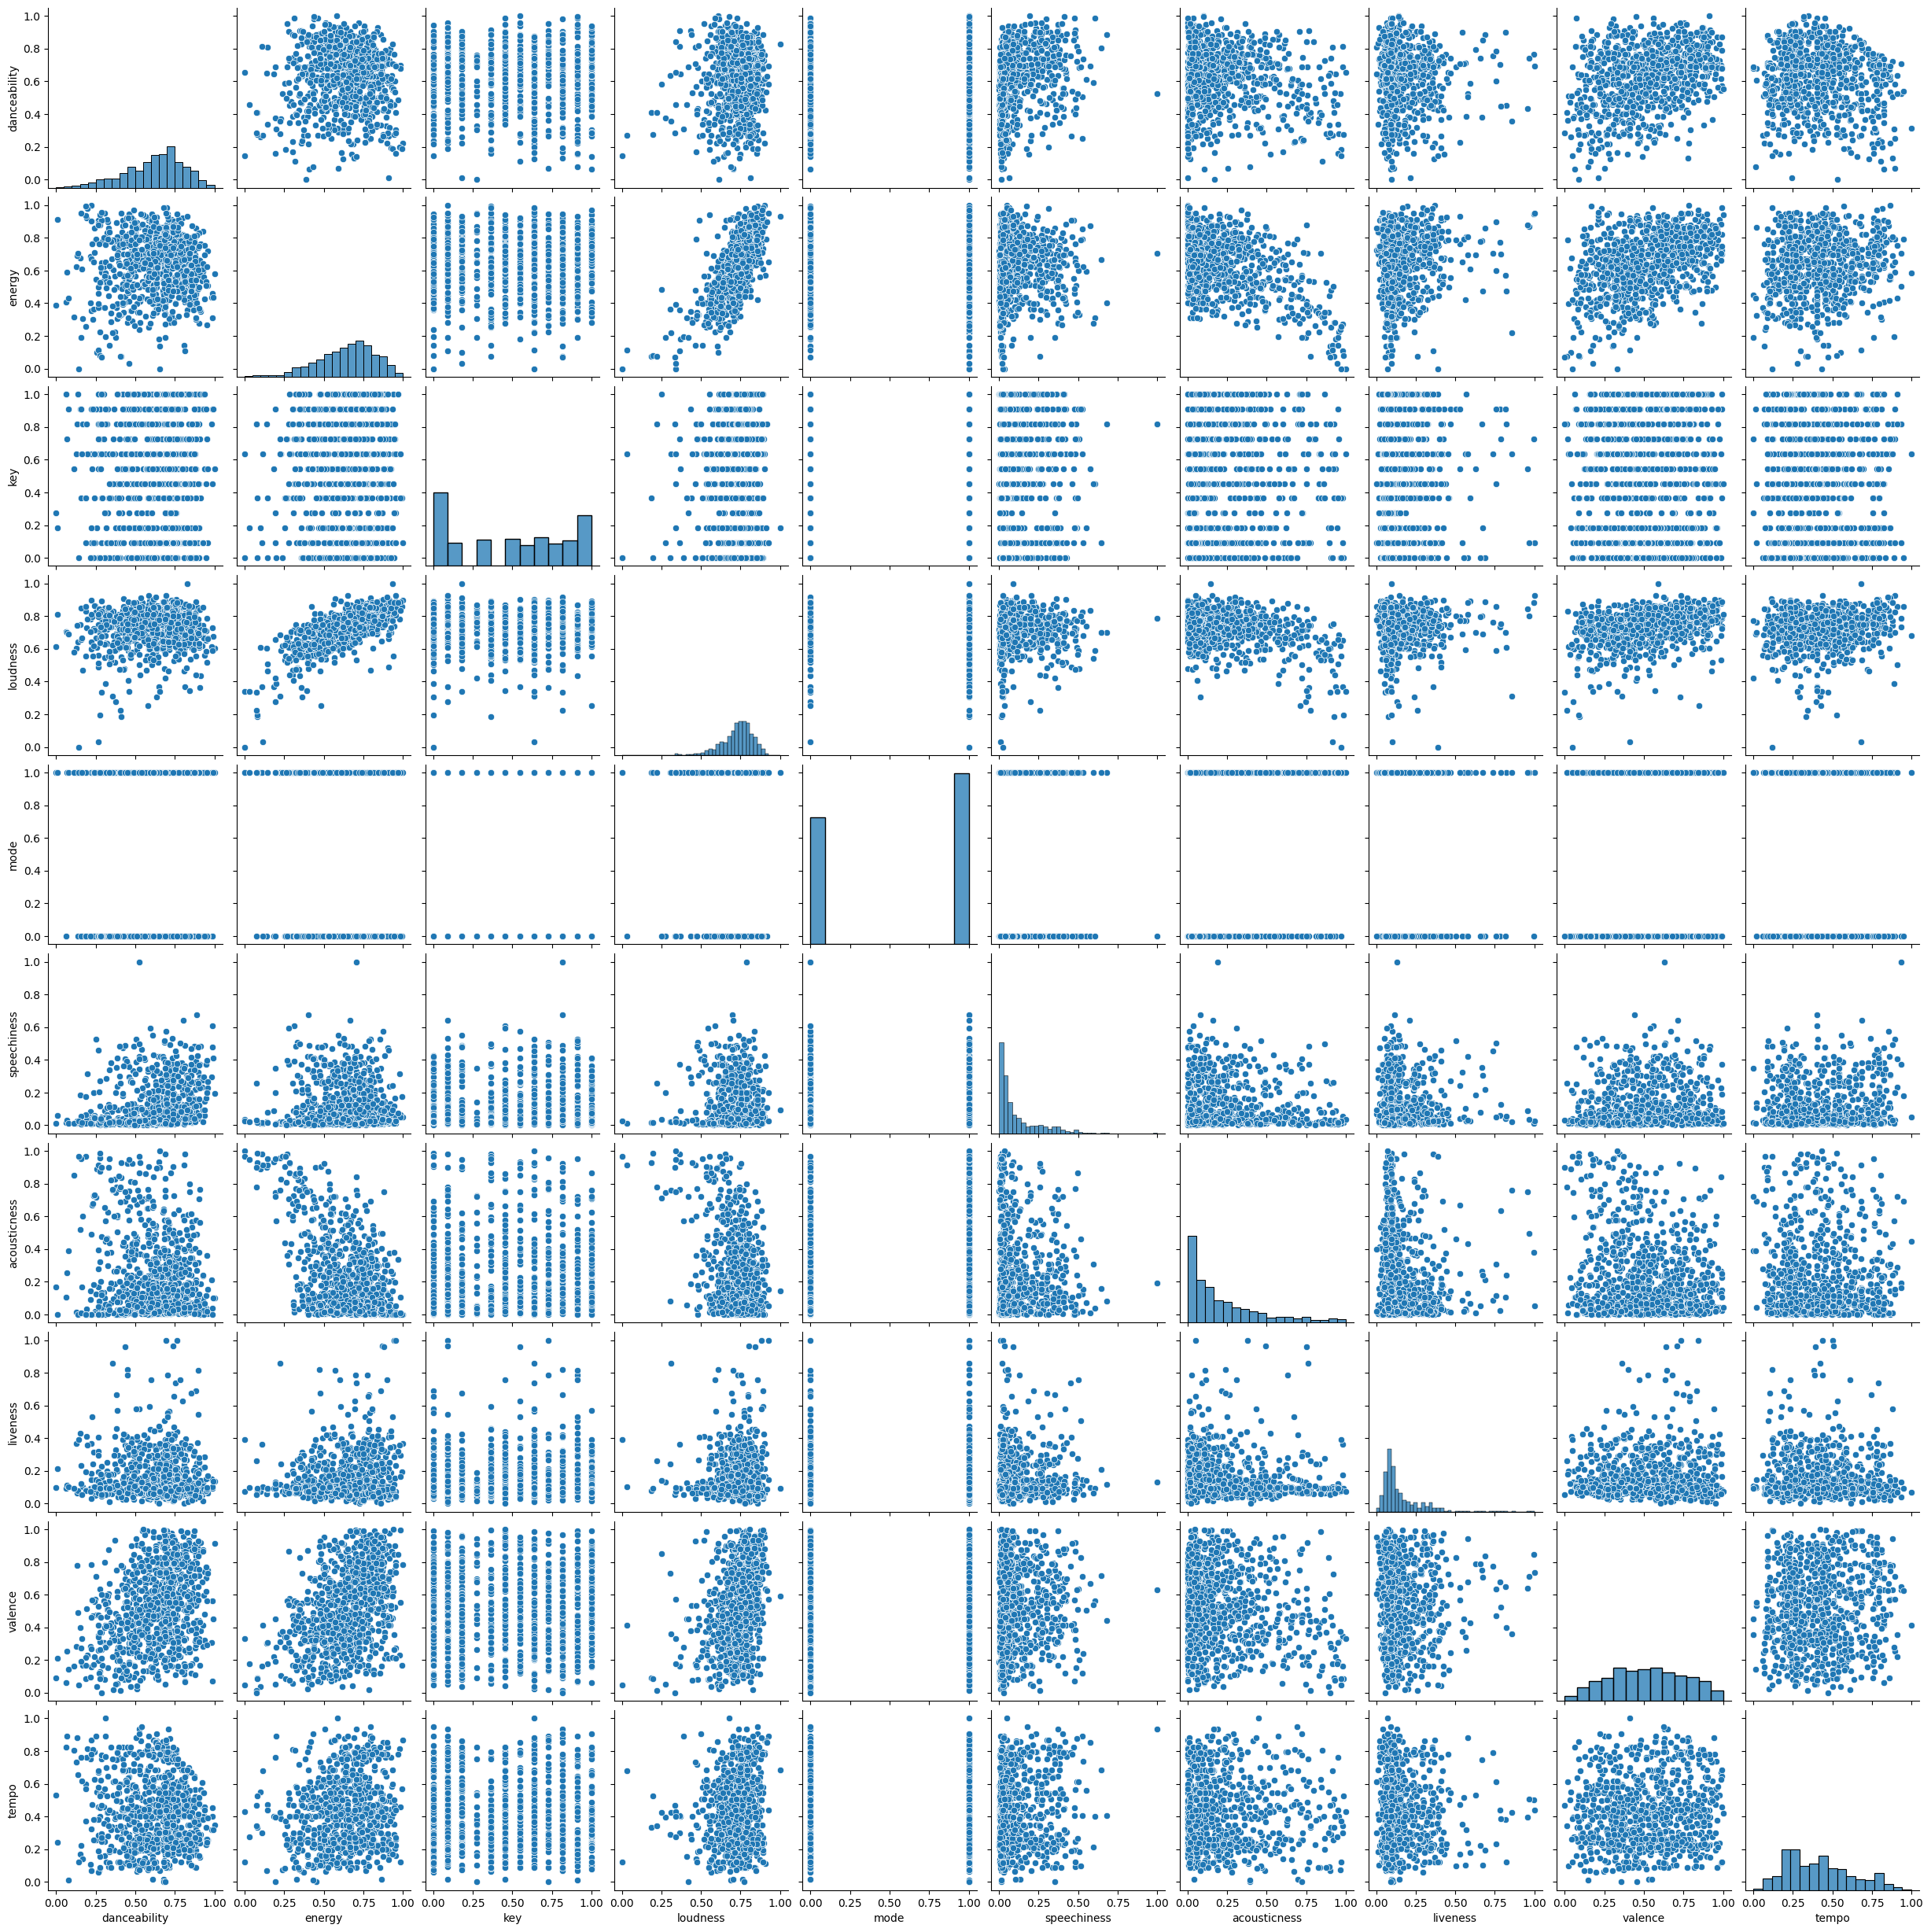

In [67]:
# Plot scatter matrix
sns.pairplot(data[num_cols])
plt.show()

Above we can visualise the pairplot between 2 variables , some plot shows the significant trends like increasing the value of loudness , energy also increases , while some of the plots are useless in terms of data analysis

In [69]:
# Sort by track_popularity in descending order and select top 10
top_songs = data[['track_name', 'track_artist', 'track_popularity']].sort_values(by='track_popularity', ascending=False).head(10)

# Display the top 10 songs
print(top_songs)


                    track_name      track_artist  track_popularity
429                    the box        Roddyricch          1.000000
95                    memories           Maroon5          1.000000
96             blinding lights         Theweeknd          1.000000
77                        tusa            Karolg          1.000000
388                    falling      Trevordaniel          0.954545
154            don't start now           Dualipa          0.954545
79         everything i wanted      Billieeilish          0.954545
21   ritmo (bad boys for life)  Theblackeyedpeas          0.909091
82                       yummy      Justinbieber          0.863636
52                     bad guy      Billieeilish          0.863636


Here we got the highest rated songs in the dataset

### Conclusion :-
1)The box , memories, blinding lights, tusa are highest rated track_name<br>
2)Billie Ellish have created highest number of songs<br>
3)The dataset mainly consists of energetic, danceable, and positive-sounding songs with a mix of studio and live recordings.
4)Popular songs tend to have higher energy, danceability, and valence (positivity).
5)The dataset leans towards bright and uplifting tracks.